16.1

In [2]:
# importing the dataset
from tensorflow.keras.datasets import fashion_mnist

In [3]:
# loading the data
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# view shape info on the data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
# we can view the images
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

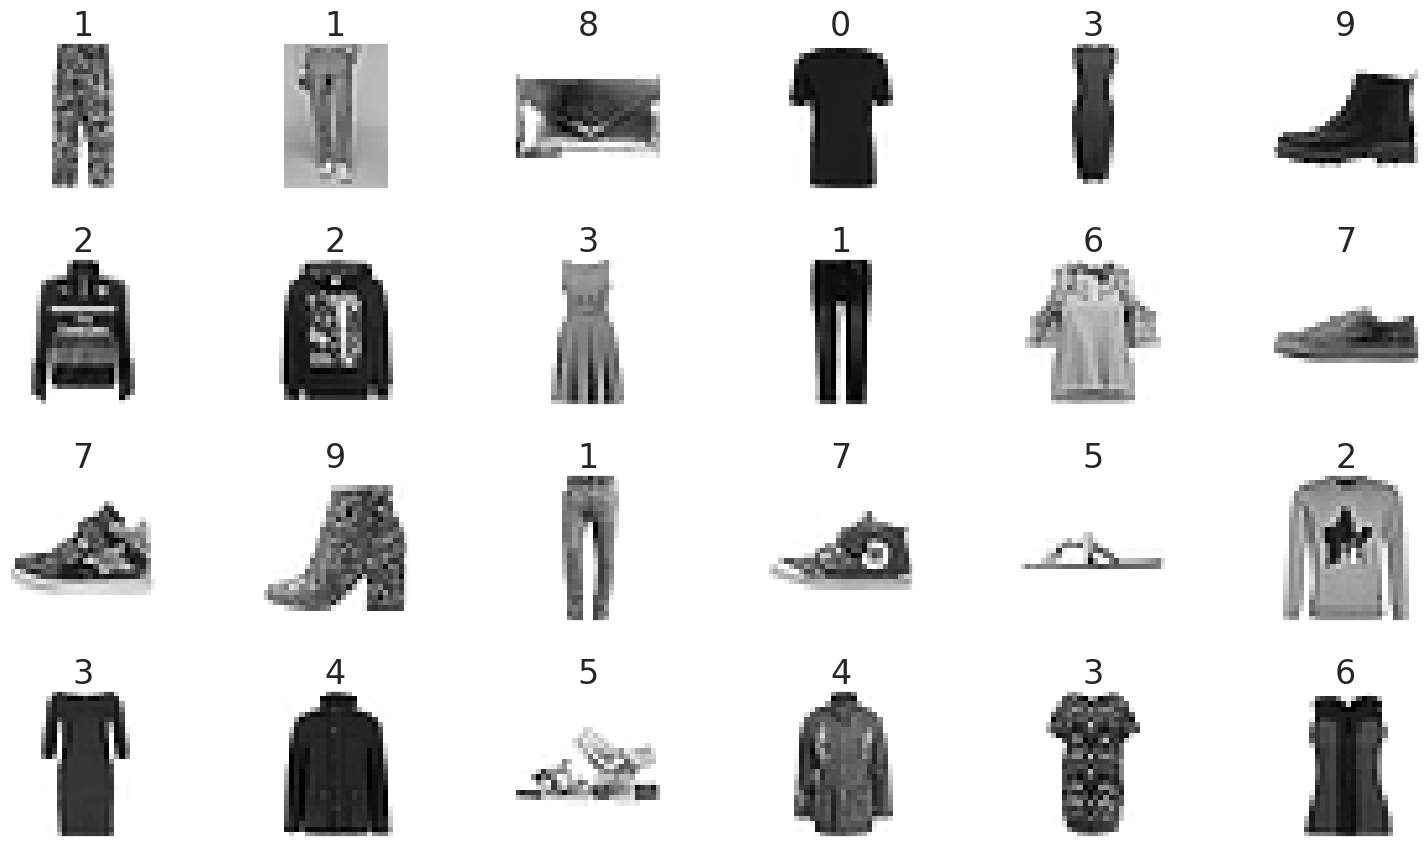

In [7]:
# using numpy random.choice function to select random data points and view them
from os import replace
import numpy as np
index = np.random.choice(np.arange(len(X_train)),24,replace=False)
figure,axes = plt.subplots(nrows=4,ncols=6,figsize=(16,9))

for item in zip(axes.ravel(),X_train[index],y_train[index]):
  axes,image,target= item
  axes.imshow(image,cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)
  plt.tight_layout()

In [9]:
# data prep: reshaping the data
X_train = X_train.reshape((60000,28,28,1))
print(X_train.shape)
X_test = X_test.reshape(10000,28,28,1)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
# normalize the data into the range of 0.0 to 1.0
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [11]:
# producing categorical data of the y_train,y_test
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)

print(y_train.shape)
print(y_train[0])

y_test = to_categorical(y_test)
print(y_test.shape)
print(y_test[0])

(60000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(10000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [12]:
# data has been prepared. now we ready the neural network
from tensorflow.keras.models import Sequential
cnn= Sequential()

In [13]:
# to make mult layers, we will need the following things
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [14]:
# creating a conv layer
cnn.add(Conv2D(filters=62, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# adding a pooling layer
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
# adding another conv layer and pooling layer to reduce dimensionality
cnn.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
# add a layer to flatten the output results
cnn.add(Flatten())

In [18]:
# add dense layers to assist with finding relationships of images
cnn.add(Dense(units=128,activation='relu'))

In [19]:
# adding another dense layer to classify outputs
cnn.add(Dense(units=10,activation='softmax'))

In [21]:
# let's view a summary of the model
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 62)     │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 62)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        71,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 483,190 (1.84 MB)

 Trainable params: 483,190 (1.84 MB)

 Non-trainable params: 0 (0.00 B)

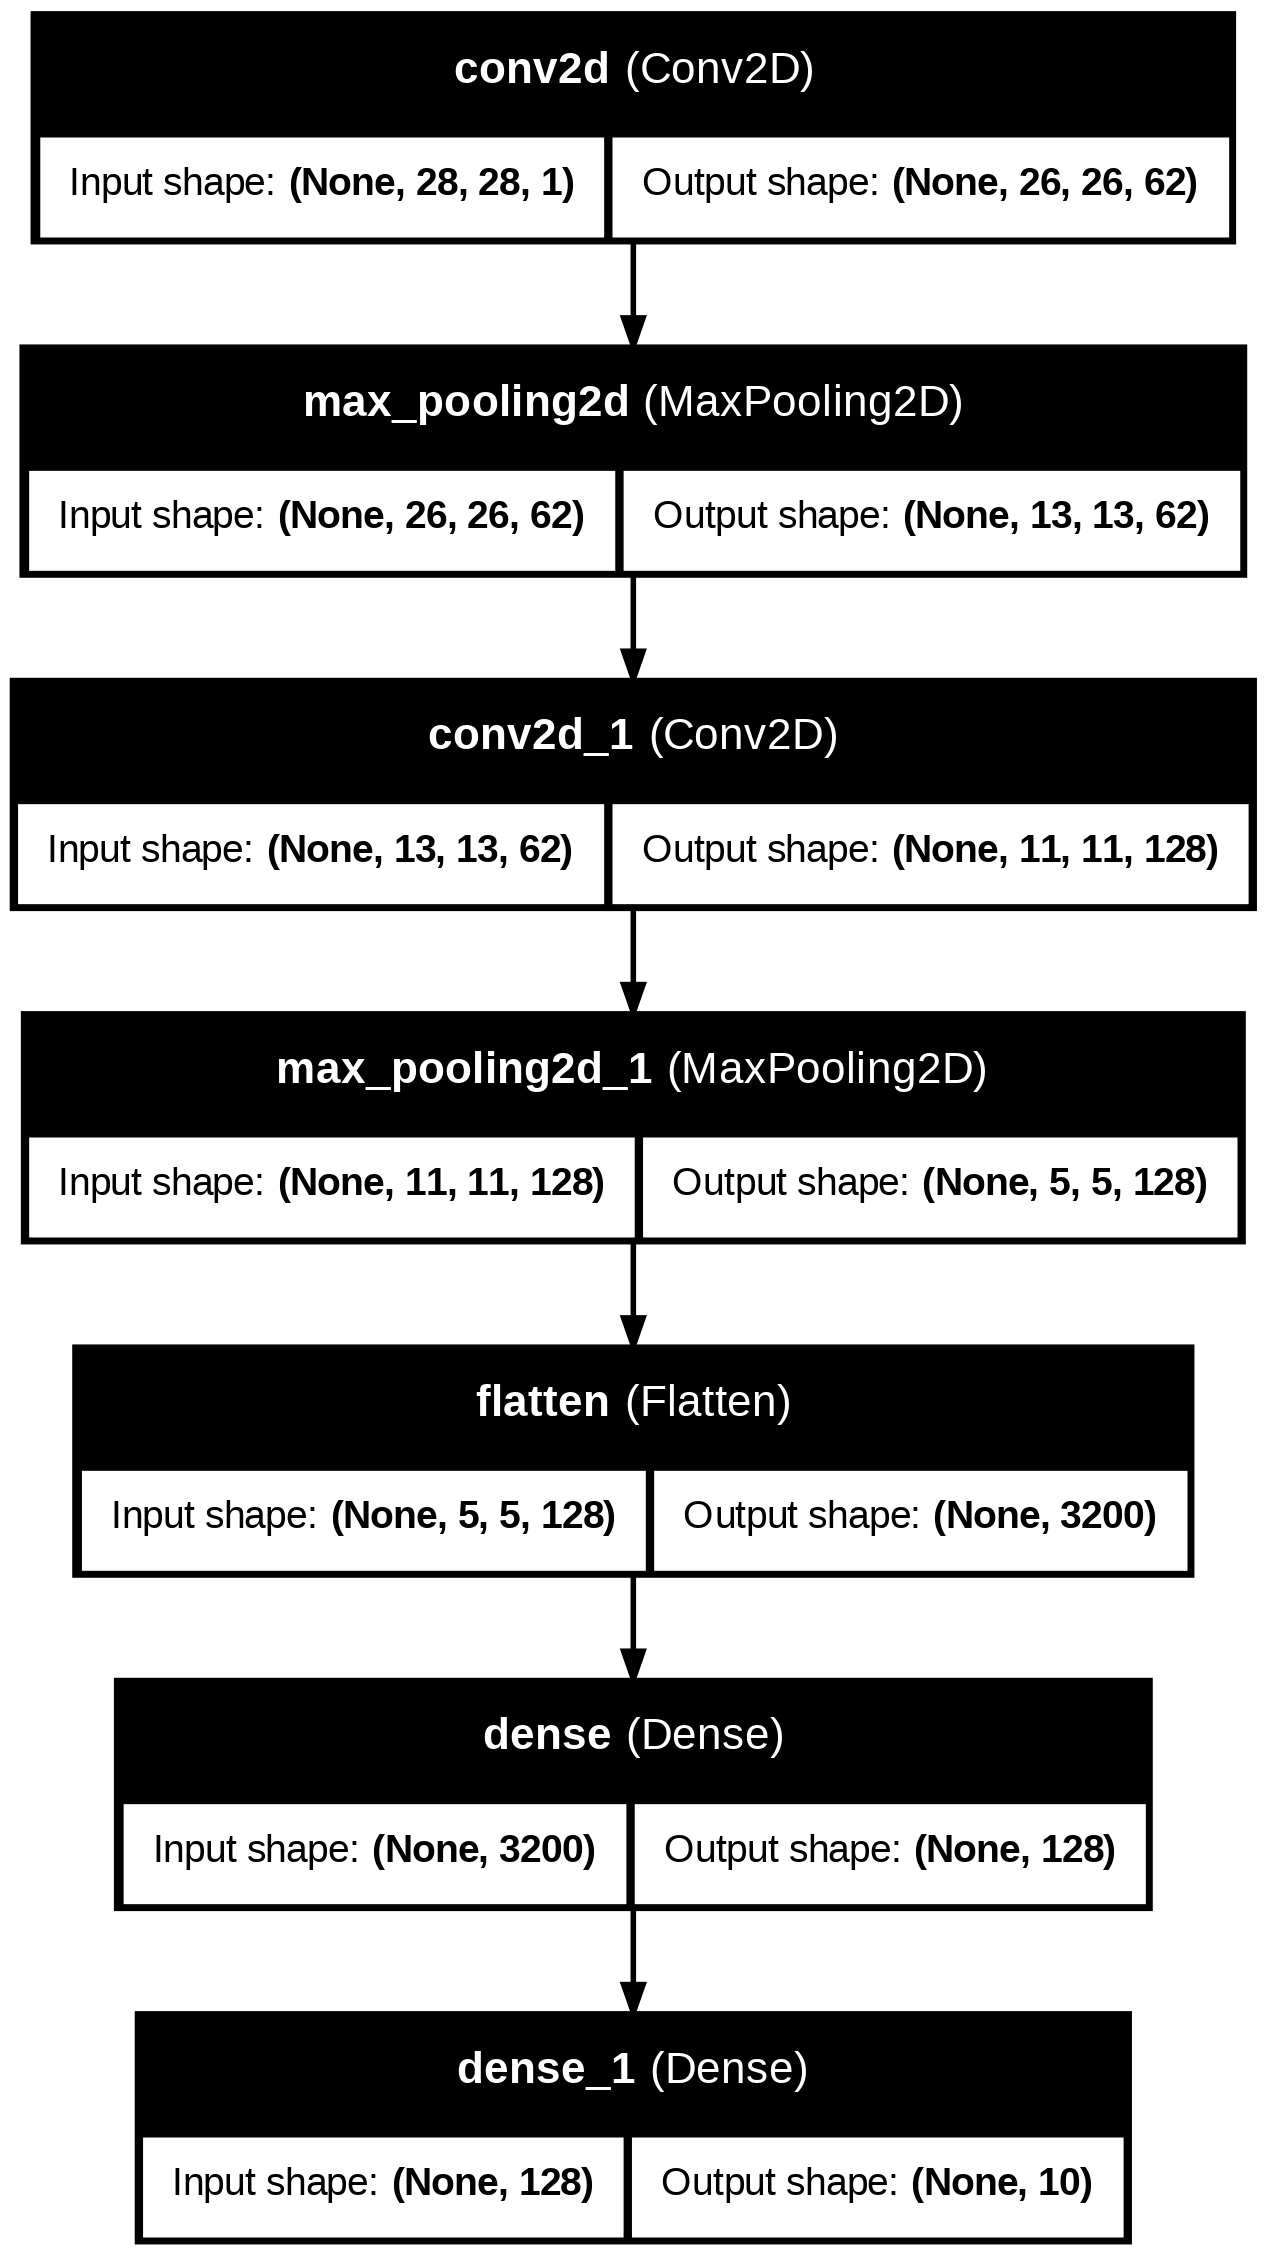

In [22]:
# we can also visualize the model
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(cnn, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [23]:
# now we compile the model
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
# and we can now train the model
cnn.fit(X_train,y_train,epochs=5,batch_size=64,validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 119s 138ms/step - accuracy: 0.7596 - loss: 0.6542 - val_accuracy: 0.8812 - val_loss: 0.3343
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 117s 139ms/step - accuracy: 0.8866 - loss: 0.3124 - val_accuracy: 0.8927 - val_loss: 0.2844
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 117s 138ms/step - accuracy: 0.9050 - loss: 0.2567 - val_accuracy: 0.8927 - val_loss: 0.2921
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 114s 135ms/step - accuracy: 0.9140 - loss: 0.2292 - val_accuracy: 0.9052 - val_loss: 0.2620
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 144s 138ms/step - accuracy: 0.9263 - loss: 0.1985 - val_accuracy: 0.9062 - val_loss: 0.2605


In [26]:
# model has been trained. evaluate model
loss, accuracy = cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9011 - loss: 0.2751


In [27]:
print(loss,accuracy)

0.2708466649055481 0.9014000296592712


In [28]:
# lets make some predictions with the model
predictions = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [29]:
# what is the first item?
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [30]:
# we view the model's prob. est for the first item
for index,prob in enumerate(predictions[0]):
  print(f'{index}:{prob:.10%}')

0:0.0000039408%
1:0.0000000120%
2:0.0000010885%
3:0.0000000153%
4:0.0000002054%
5:0.0017216335%
6:0.0000007937%
7:0.0117771742%
8:0.0000060386%
9:99.9864816666%


In [31]:
# we locate the incorrect predictions to view them
images = X_test.reshape((10000,28,28))
incorrectPred = []

for i , (p,e) in enumerate(zip(predictions,y_test)):
  predicted,expected = np.argmax(p),np.argmax(e)

  if predicted != expected:
    incorrectPred.append((i,images[i],predicted,expected))

In [32]:
# how many incorrect predictions?
print(len(incorrectPred))

986


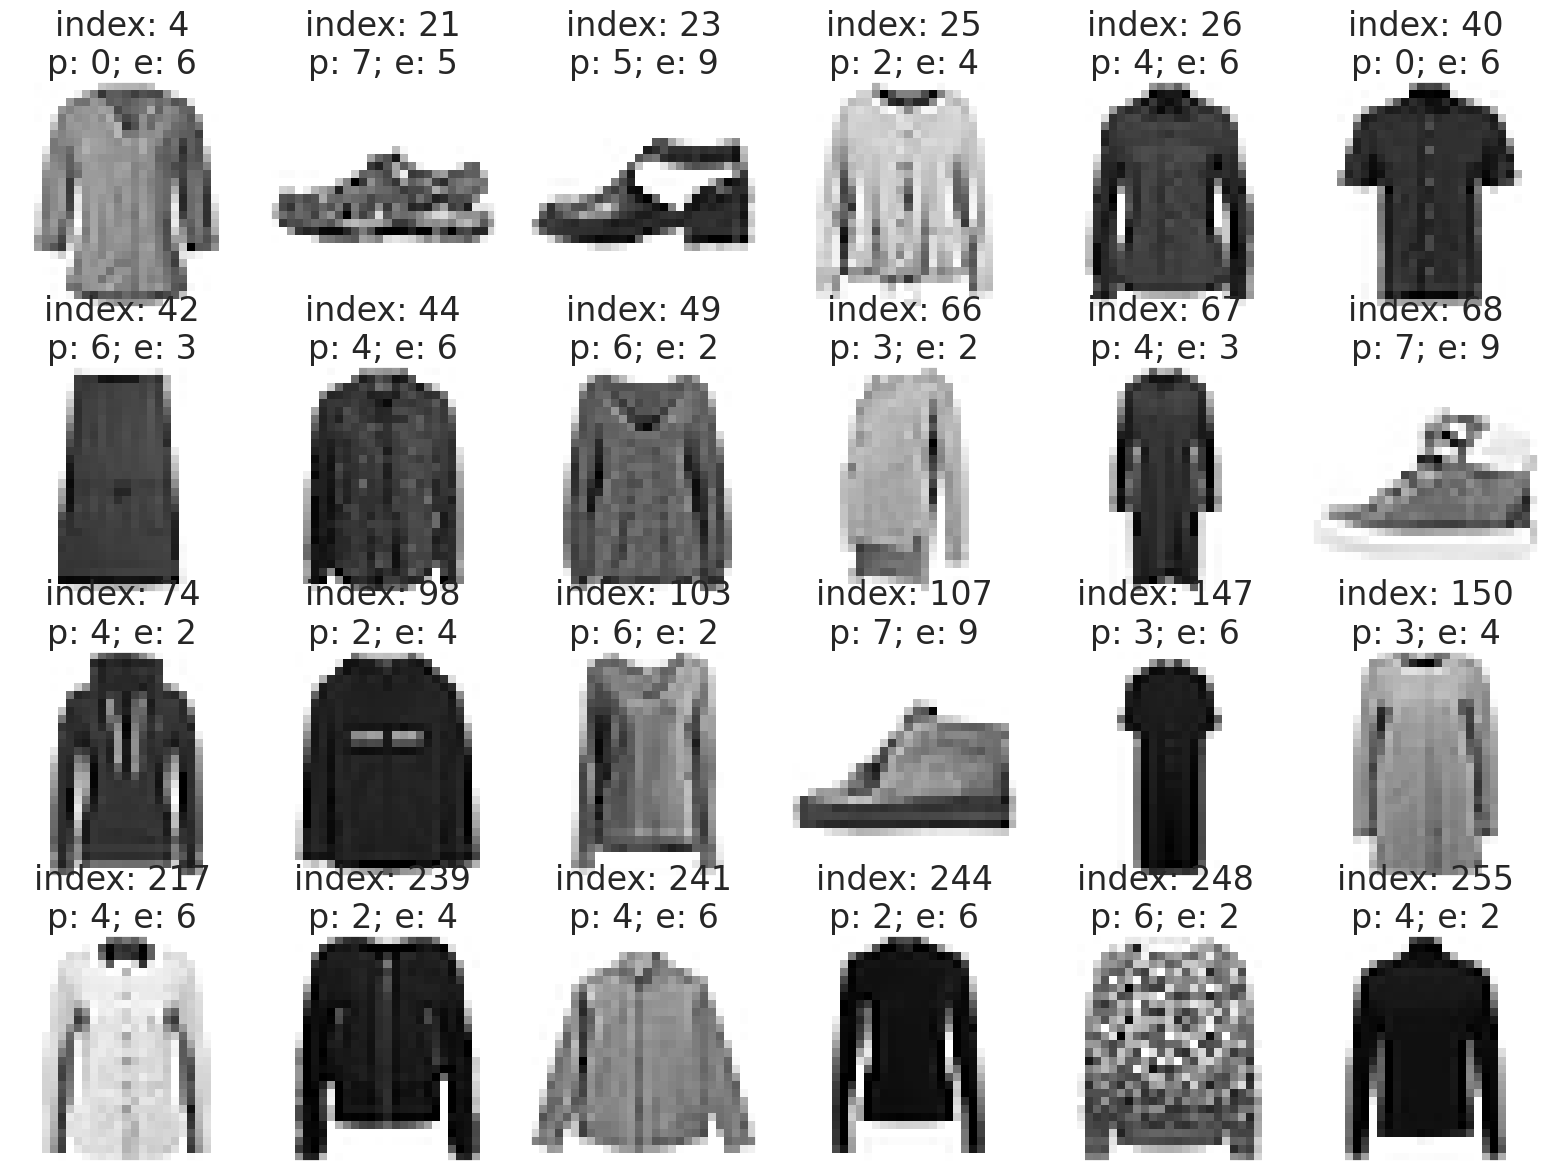

In [34]:
# visualize some incorrect ones (show predicted value, expected value)
figure,axes= plt.subplots(nrows=4,ncols=6,figsize=(16,12))

for axes,item in zip(axes.ravel(),incorrectPred):
  index,image,predicted,expected = item
  axes.imshow(image,cmap=plt.cm.gray_r)
  axes.set_xticks([])  # remove x-axis tick marks
  axes.set_yticks([])  # remove y-axis tick marks
  axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
  plt.tight_layout()

In [36]:
# define a function to display the prob. of incorrect predictions
def display_prob(prediction):
  for index,prob in enumerate(prediction):
    print(f'{index}: {prob:.10%}')


In [37]:
# let's view some prob. of incorrect predictions
display_prob(predictions[239])

0: 0.0101545520%
1: 0.0031054191%
2: 55.1519334316%
3: 0.0046719688%
4: 41.0404086113%
5: 0.0000114956%
6: 3.7855334580%
7: 0.0002857932%
8: 0.0019550436%
9: 0.0019364357%


In [38]:
display_prob(predictions[49])

0: 4.6870253980%
1: 0.0176448419%
2: 9.7299613059%
3: 3.2330162823%
4: 3.0665716156%
5: 0.0043093991%
6: 79.2427897453%
7: 0.0022958027%
8: 0.0068477486%
9: 0.0095309326%


In [39]:
display_prob(predictions[4])

0: 48.4867244959%
1: 0.0001985784%
2: 0.7831493393%
3: 0.6687575486%
4: 21.7078298330%
5: 0.0000686126%
6: 28.3524036407%
7: 0.0000792518%
8: 0.0000291799%
9: 0.0007623926%


In [41]:
# we can also save/load the trained model (saving time in the future) by doing the following:
cnn.save('fmnist.keras') # to save

In [42]:
# to load:
from tensorflow.keras.models import load_model
cnn = load_model('fmnist.keras')

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


For this, the code was from the book "Intro to Python for Computer Science and Data Science."
In the book, they used the MNIST dataset, but for this assignment we replace it with the fashion mnist dataset.

The model performs better on the mnist dataset, having a nearly a 100% accuracy for making predictions on the digits classifications. The model has a 90% accuracy for the fashion dataset, so 10% of its predictions are incorrect! (This is expected as the fashion dataset appears more visually complex)
We can also view the training times, which in this case, took about twice the time compared to the digits. This would suggest that the fashion data is more complex than the digits.

16.4

In [44]:
cnn = Sequential()
# creating a conv layer
cnn.add(Conv2D(filters=62, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
# adding a pooling layer
cnn.add(MaxPooling2D(pool_size=(2,2)))
# adding another conv layer and pooling layer to reduce dimensionality
cnn.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
# add a layer to flatten the output results
cnn.add(Flatten())
# dense layer to produce final output
cnn.add(Dense(units=10, activation='softmax'))
# let's view a summary of the model
cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 62)     │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 62)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 128)    │        71,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        32,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,182 (406.96 KB)

 Trainable params: 104,182 (406.96 KB)

 Non-trainable params: 0 (0.00 B)

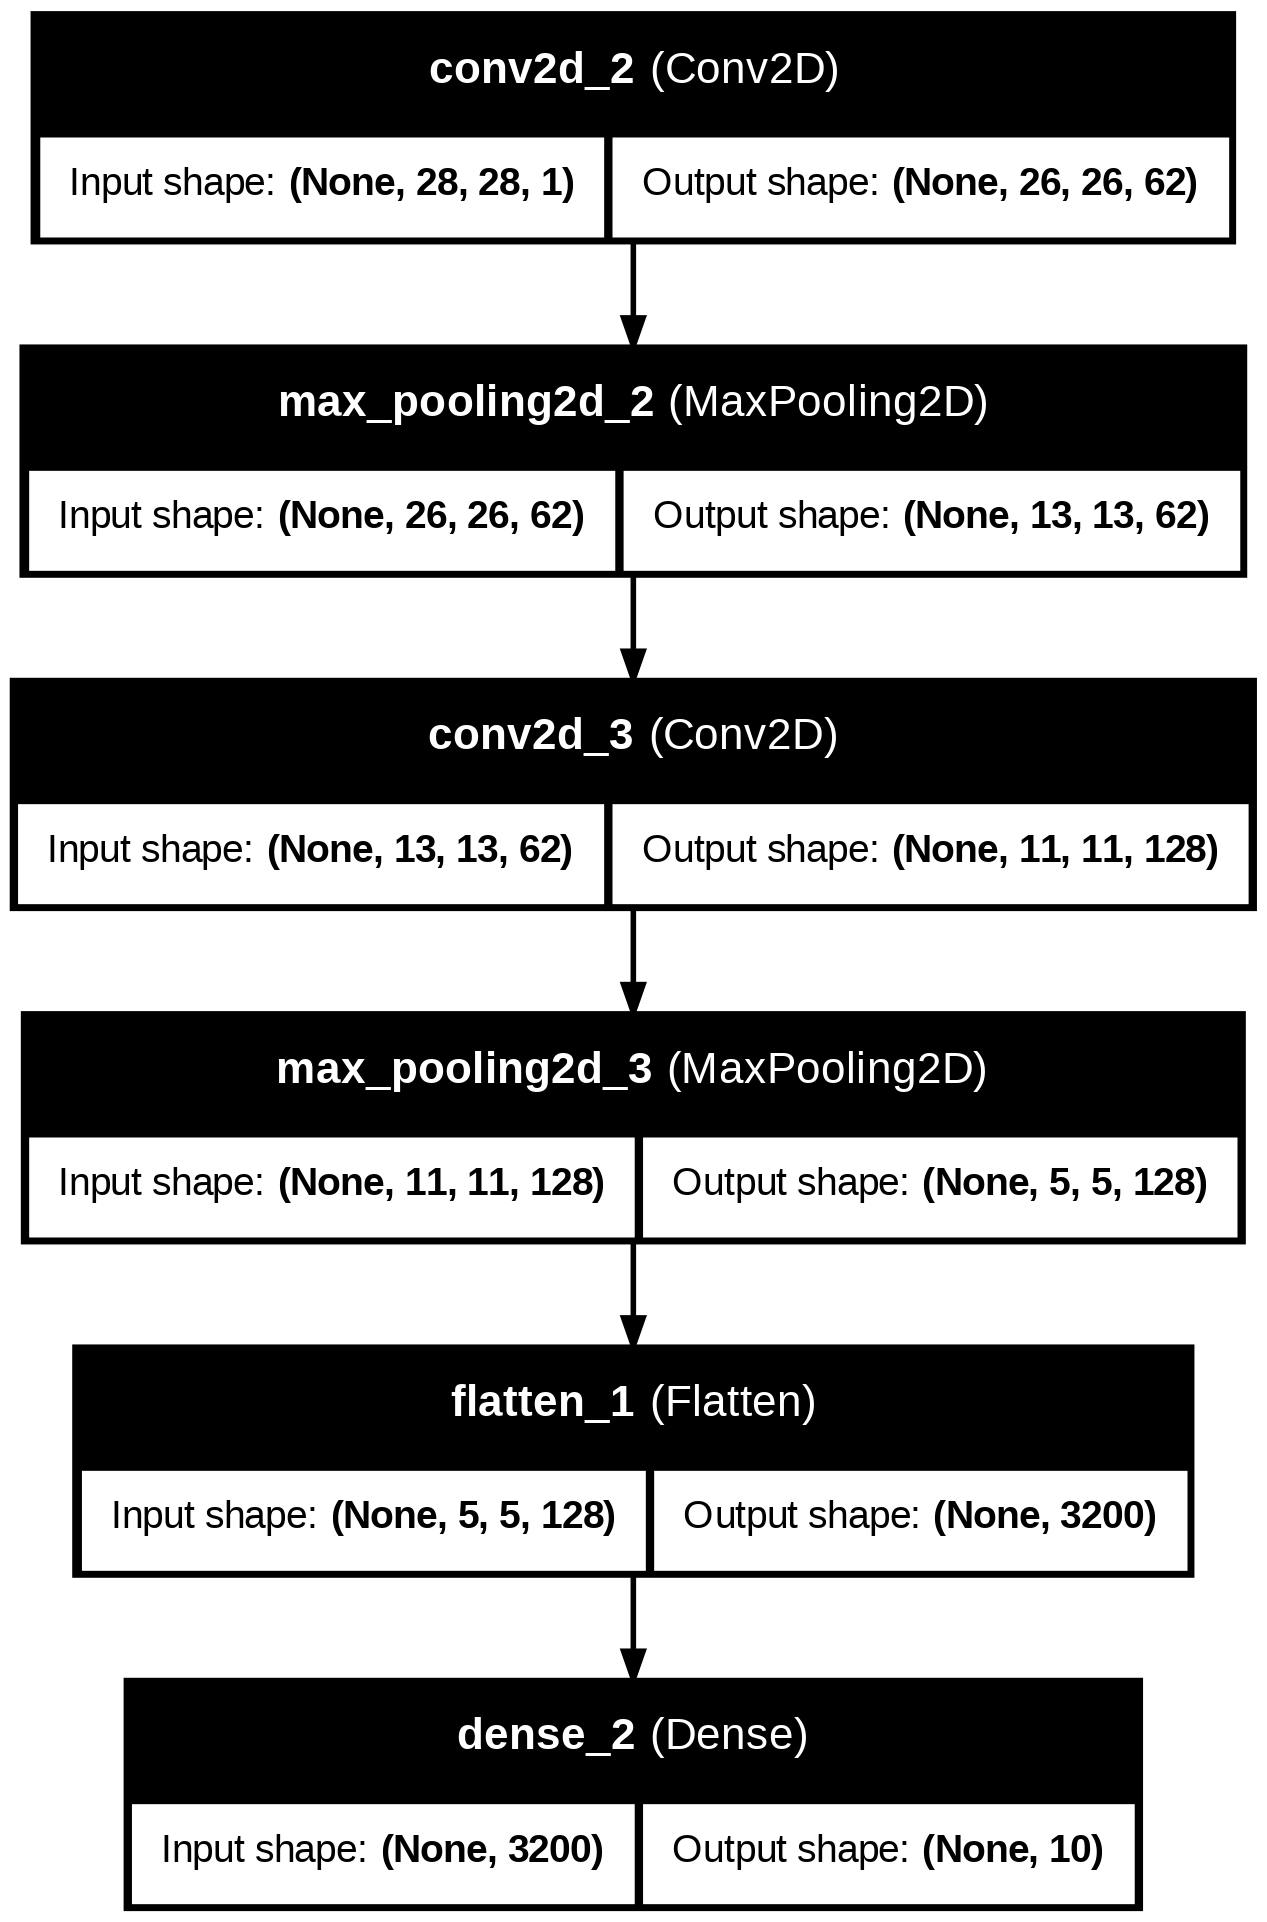

In [45]:
# we can also visualize the model
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(cnn, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [46]:
# now we compile the model
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
# and we can now train the model
cnn.fit(X_train,y_train,epochs=5,batch_size=64,validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 113s 132ms/step - accuracy: 0.7489 - loss: 0.7114 - val_accuracy: 0.8723 - val_loss: 0.3585
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 110s 130ms/step - accuracy: 0.8791 - loss: 0.3347 - val_accuracy: 0.8907 - val_loss: 0.2996
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 111s 131ms/step - accuracy: 0.8950 - loss: 0.2875 - val_accuracy: 0.8965 - val_loss: 0.2833
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 112s 133ms/step - accuracy: 0.9072 - loss: 0.2552 - val_accuracy: 0.8935 - val_loss: 0.3056
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 109s 129ms/step - accuracy: 0.9167 - loss: 0.2304 - val_accuracy: 0.8992 - val_loss: 0.2746


In [48]:
# model has been trained. evaluate model
loss, accuracy = cnn.evaluate(X_test,y_test)
print(loss,accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8915 - loss: 0.3025
0.29069608449935913 0.8913000226020813


Running the model without the first dense layer causes the accuracy to become reduced. This is expected as the complexity of the model is decreased. We can also see a reduced training time.

In [49]:
cnn = Sequential()
# creating a conv layer
cnn.add(Conv2D(filters=62, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
# adding a pooling layer
cnn.add(MaxPooling2D(pool_size=(2,2)))
# adding another conv layer and pooling layer to reduce dimensionality
cnn.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
# add a layer to flatten the output results
cnn.add(Flatten())
# we add a new dense layer with 4096 neurons
cnn.add(Dense(units=4096,activation='relu'))
# add dense layers to assist with finding relationships of images
cnn.add(Dense(units=128,activation='relu'))
# dense layer to produce final output
cnn.add(Dense(units=10, activation='softmax'))
# let's view a summary of the model
cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 62)     │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 62)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 128)    │        71,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    13,111,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,709,174 (52.30 MB)

 Trainable params: 13,709,174 (52.30 MB)

 Non-trainable params: 0 (0.00 B)

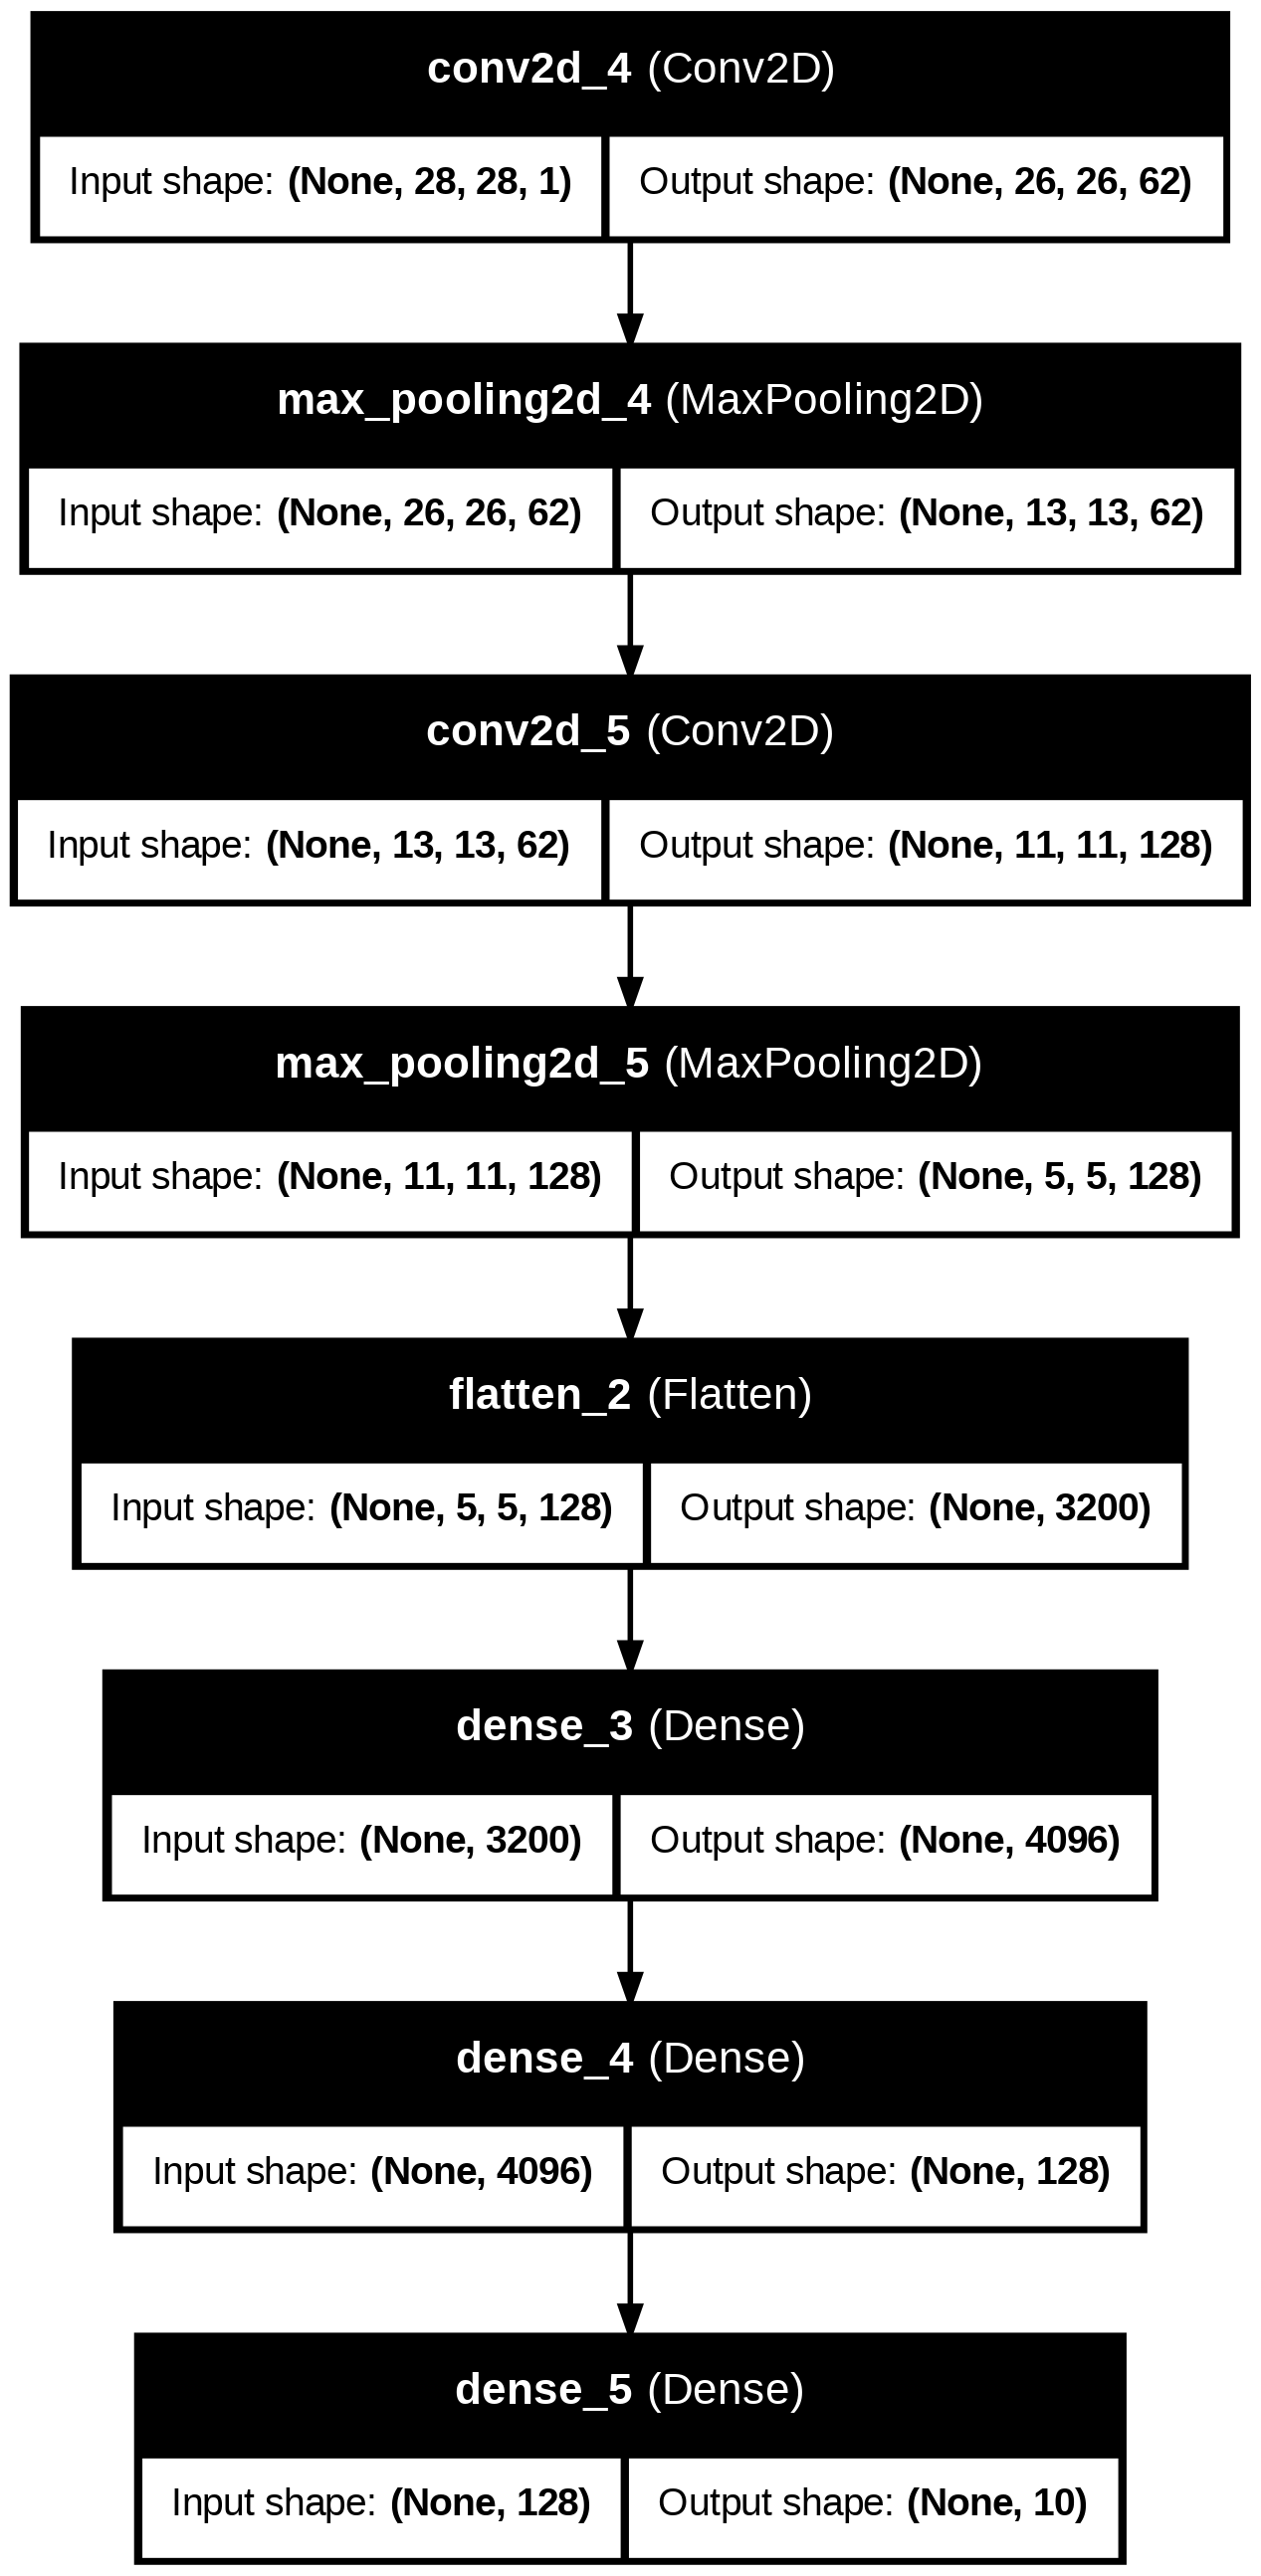

In [50]:
# we can also visualize the model
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(cnn, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [51]:
# now we compile the model
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
# and we can now train the model
cnn.fit(X_train,y_train,epochs=5,batch_size=64,validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 379s 447ms/step - accuracy: 0.7863 - loss: 0.5748 - val_accuracy: 0.8877 - val_loss: 0.3051
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 379s 443ms/step - accuracy: 0.8939 - loss: 0.2768 - val_accuracy: 0.9052 - val_loss: 0.2611
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 387s 449ms/step - accuracy: 0.9142 - loss: 0.2260 - val_accuracy: 0.9015 - val_loss: 0.2701
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 372s 441ms/step - accuracy: 0.9274 - loss: 0.1888 - val_accuracy: 0.9172 - val_loss: 0.2327
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 382s 441ms/step - accuracy: 0.9420 - loss: 0.1517 - val_accuracy: 0.9178 - val_loss: 0.2595


In [54]:
# model has been trained. evaluate model
loss, accuracy = cnn.evaluate(X_test,y_test)
print(loss,accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.9044 - loss: 0.2937
0.2805458605289459 0.9057999849319458


The new model has increased complexity with a large dense layer added. This has not improved the prediction quality at all, but has significantly incrased the amount of time it takes to train the model. If we want a higher level of accuracy, it may be best to try a different model or layer setup.